In [29]:
# equations and such from 1405.7365 for the most part
# some of this will have to be new because there are more restrictions for higher dimensions than paper implies
# more detailed (schizo) comments are left in the PertRNBH before this guy

In [1]:
import sympy as smp
import matplotlib.pyplot as plt
smp.init_printing(use_latex='mathjax')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
import numpy as np
import scipy as sp

In [2]:
# We figured out that the math doesnt suck when we have d = 2, so we'll build and test with this and then introduce the extra cubic cutoff term for d>2

In [3]:
rmax = 1000000000
num = 500

In [13]:
d = 2
k = 0
l = 1
q = 0

In [14]:
# surely there exist EQ numbers for all these in the 14** paper

In [15]:
def mu(R):
    return (R**(d-2))*(k+(q**2)/(R**(2*d-4))+(R**2)/(l**2))

def f(r,R):
    return k - mu(R)/(r**(d-2)) + (q**2)/(r**(2*d-4)) + (r**2)/(l**2)

def fp(r,R):
    return (d-2)*mu(R)/(r**(d-3)) + (4-2*d)*(q**2)/(r**(2*d-5))+ 2*r/(l**2)

def beta(R):
    return 4 * np.pi / fp(R,R)

def gamma2(r0,R):
    return -1*f(r0,R)*(r0**(2*d-4))

In [16]:
def k1(r0grid,R):
    list = []
    for i in range(num):
        r0 = r0grid[i]
        rbar = 1#R / 2
        rgrid = np.linspace(rbar,r0,num)
        integ = 1/f(rgrid,R)
        mask = np.isfinite(integ)
        sum =  (4 * np.pi / beta(R)) * np.trapezoid(integ[mask],rgrid[mask])
        list.append(sum)
    return np.array(list)

def k2(r0grid,R):
    list = []
    for i in range(num):
        r0 = r0grid[i]
        rgrid = np.logspace(np.log10(R+0.001),np.log10(rmax),num)
        integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R)))))/f(rgrid,R)
        mask = np.isfinite(integ)
        sum = (2*np.pi/beta(R)) * np.trapezoid(integ[mask],rgrid[mask])
        list.append(sum)
    return np.array(list)

def k3(r0grid,R):
    list = []
    for i in range(num):
        r0 = r0grid[i]
        rgrid = np.linspace(r0,R-0.1,num)
        integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R))))/f(rgrid,R))
        mask = np.isfinite(integ)
        sum = (4*np.pi/beta(R)) * np.trapezoid(integ[mask],rgrid[mask])
        list.append(sum)
    return np.array(list)

In [17]:
def alpha(r0grid,R):
    return 2*np.exp(k1(r0grid,R)+k2(r0grid,R)+k3(r0grid,R))

In [20]:
R = 3
r0grid = np.linspace(0.1,R-0.1,num)
alphagrid = alpha(r0grid,R)

k1grid = k1(r0grid,R)


k2grid = k2(r0grid,R)


k3grid = k3(r0grid,R)

/var/folders/sf/wr1kbwcd5dj1bbcsxb86lz7w0000gn/T/ipykernel_54141/821789731.py:29: RuntimeWarning: divide by zero encountered in divide
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R))))/f(rgrid,R))
/var/folders/sf/wr1kbwcd5dj1bbcsxb86lz7w0000gn/T/ipykernel_54141/821789731.py:29: RuntimeWarning: invalid value encountered in sqrt
  integ = (1 - 1/(np.sqrt(1+f(rgrid,R)*(rgrid**(2*d-4))/(gamma2(r0,R))))/f(rgrid,R))


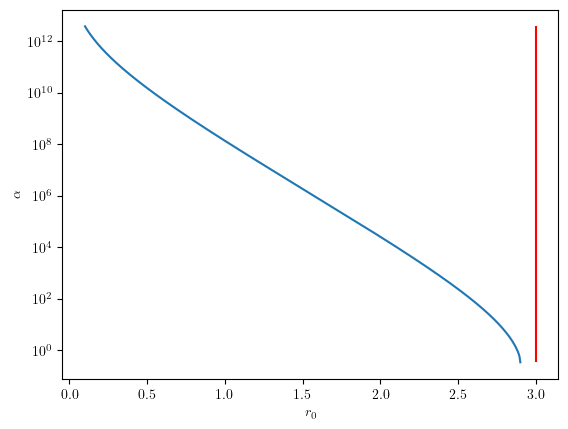

In [21]:
plt.plot(r0grid,alphagrid,label=r'$\alpha$')
plt.xlabel(r'$r_0$')
plt.ylabel(r'$\alpha$')
plt.vlines(R,alphagrid.min(),alphagrid.max(),colors='r',label="Horizon")
plt.semilogy()
# plt.ylim((1,10))
plt.show()

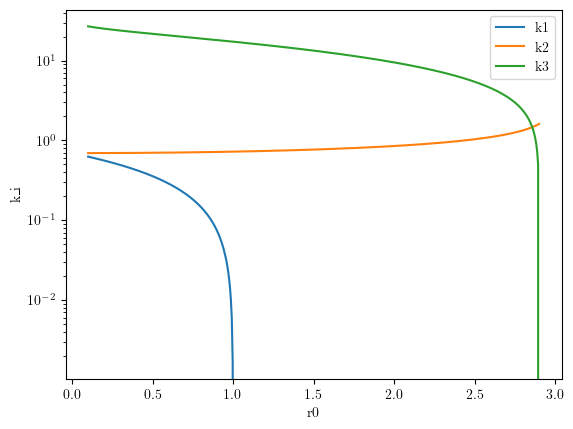

In [22]:
plt.plot(r0grid,k1grid,label='k1')
plt.plot(r0grid,k2grid,label='k2')
plt.plot(r0grid,k3grid,label='k3')
plt.xlabel('r0')
plt.ylabel('k_i')
plt.legend()
# plt.semilogx()
plt.semilogy()
plt.show()

In [27]:
def det(rgrid,R):
    # rough estimate of r_crit in EQ 40 of 1405.7365
    eqgrid = fp(rgrid,R)*rgrid+(2*d-4)*f(rgrid,R)
    # print(f'eqgrid: {eqgrid}')
    # print(f'abseqgrid: {np.abs(eqgrid)}')
    minloc = np.argmin(np.abs(eqgrid))
    return eqgrid[minloc],rgrid[minloc]

det(np.linspace(0.001,R,1000000),R)

(2e-06, 0.001)

In [ ]:
# this is not consistent with what the paper expects, huh
#  time to calculate some area i guess

In [30]:
def AInteg(rgrid,r0,R):
    return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))

def divArea(rgrid,R):
    return (rgrid**(d-2)) / np.sqrt(f(rgrid,R))

In [33]:
def shockArea(r0grid,R):
    areaList = []
    area1List = [] # this guy and below are for debug
    area2List = []
    rgrid1 = np.logspace(np.log10(R+0.1),np.log10(rmax),num)
    divAreaInteg = divArea(rgrid1,R)
    for i in range(num):
        r0 = r0grid[i]
        rgrid2 = np.linspace(r0,R-0.1,num)
        areaInteg1 = AInteg(rgrid1,r0,R) - divAreaInteg
        area1 = np.trapezoid(areaInteg1,rgrid1)
        areaInteg2 = AInteg(rgrid2,r0,R)
        mask = np.isfinite(areaInteg2)
        area2 = np.trapezoid(areaInteg2[mask],rgrid2[mask])
        areaSum = (2 * area1) + (4 * area2)
        areaList.append(areaSum)
        area1List.append(area1)
        area2List.append(area2)
    return np.array(areaList) # , area1List, area2List

In [34]:
areaInt = shockArea(r0grid,R)

/var/folders/sf/wr1kbwcd5dj1bbcsxb86lz7w0000gn/T/ipykernel_54141/2322992211.py:2: RuntimeWarning: divide by zero encountered in divide
  return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))
/var/folders/sf/wr1kbwcd5dj1bbcsxb86lz7w0000gn/T/ipykernel_54141/2322992211.py:2: RuntimeWarning: invalid value encountered in sqrt
  return (rgrid**(d-2)) / np.sqrt(f(rgrid,R) + gamma2(r0,R)*(rgrid**(4-2*d)))


Text(0, 0.5, 'shock area')

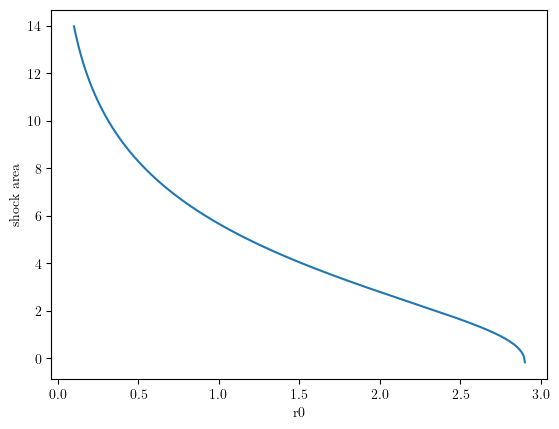

In [37]:
plt.plot(r0grid,areaInt)
plt.xlabel('r0')
plt.ylabel('shock area')

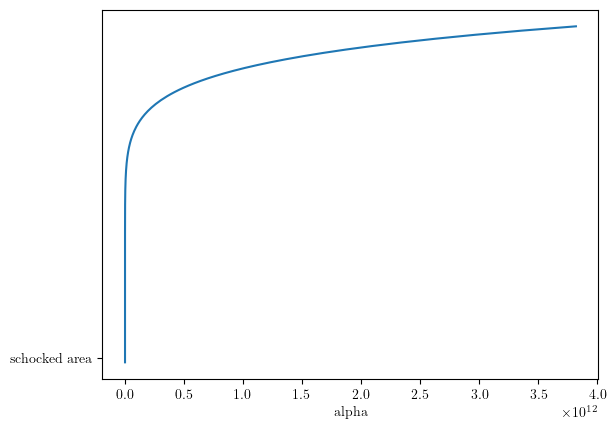

In [38]:
plt.plot(alphagrid,areaInt)
plt.xlabel('alpha')
plt.plot('schocked area')
plt.show()

In [41]:
# now lets do the areas of unshocked regions, this area functional comes from EQ 12
# these unshocked areas are gonna be ultimately dependent on the strip width for like real params, but for now we can just punch in rmin
def unAreaInt(rminarr,R): # area for one unbroken surface
    arealist = []
    for rmin in rminarr:
        r = np.logspace(np.log10(rmin+0.1),np.log10(rmax-0.1),num)
        integ = 2 * (r**(d-2))/np.sqrt(f(r,R)-f(r,R)*((rmin/r)**(2*d-2)))
        area = np.trapezoid(integ,r)
        arealist.append(area)
    return np.array(arealist)

In [73]:
rminarr = np.logspace(np.log10(R),np.log10(rmax-0.1),num)

In [74]:
unArea = unAreaInt(rminarr,R)

/var/folders/sf/wr1kbwcd5dj1bbcsxb86lz7w0000gn/T/ipykernel_54141/3594226756.py:7: RuntimeWarning: divide by zero encountered in divide
  integ = 2 * (r**(d-2))/np.sqrt(f(r,R)-f(r,R)*((rmin/r)**(2*d-2)))


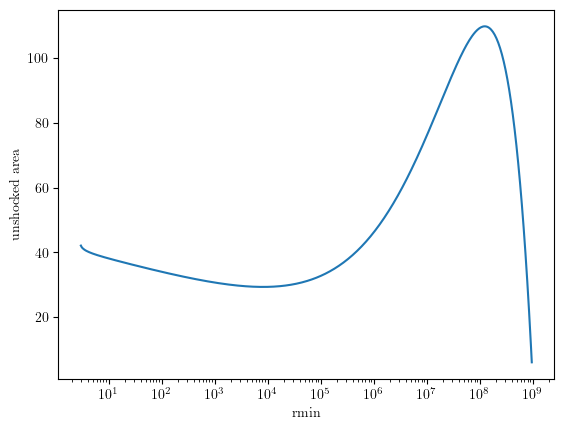

In [77]:
# rememeber R = 3
plt.plot(rminarr,unArea)
plt.xlabel("rmin")
plt.ylabel("unshocked area")
plt.semilogx()
plt.show()

In [82]:
np.argmin(unArea[:-10])

np.int64(201)

Text(0, 0.5, 'propto mutual inf')

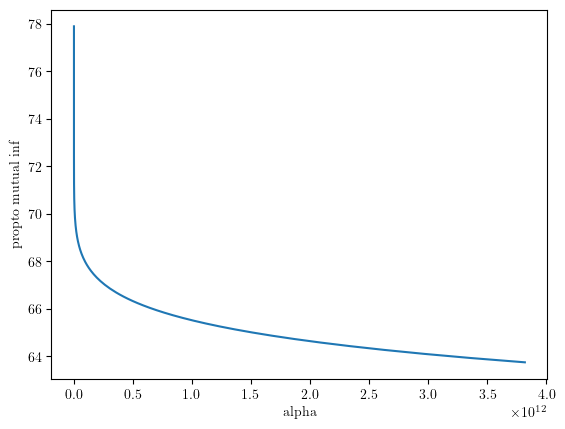

In [81]:
plt.plot(alphagrid,(2*unArea[-201]-areaInt))
plt.xlabel("alpha")
plt.ylabel("propto mutual inf")

In [ ]:
# ok i have no idea what to expect from this jawn
# i guess we could plot like the Lcrit vs alpha in the flavor of figure 1?